[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
15/15 [==============================] - 8s 164ms/step - loss: 0.2095
Epoch 2/50
15/15 [==============================] - 2s 118ms/step - loss: 0.0247
Epoch 3/50
15/15 [==============================] - 2s 112ms/step - loss: 0.0169
Epoch 4/50
15/15 [==============================] - 2s 125ms/step - loss: 0.0075
Epoch 5/50
15/15 [==============================] - 2s 117ms/step - loss: 0.0048
Epoch 6/50
15/15 [==============================] - 2s 111ms/step - loss: 0.0036
Epoch 7/50
15/15 [==============================] - 2s 107ms/step - loss: 0.0034
Epoch 8/50
15/15 [==============================] - 2s 107ms/step - loss: 0.0032
Epoch 9/50
15/15 [==============================] - 2s 106ms/step - loss: 0.0027
Epoch 10/50
15/15 [==============================] - 2s 116ms/step - loss: 0.0030
Epoch 11/50
15/15 [==============================] - 2s 129ms/step - loss: 0.0026
Epoch 12/50
15/15 [==============================] - 2s 102ms/step - loss: 0.0023
Epoch 13/50
15/15 [======

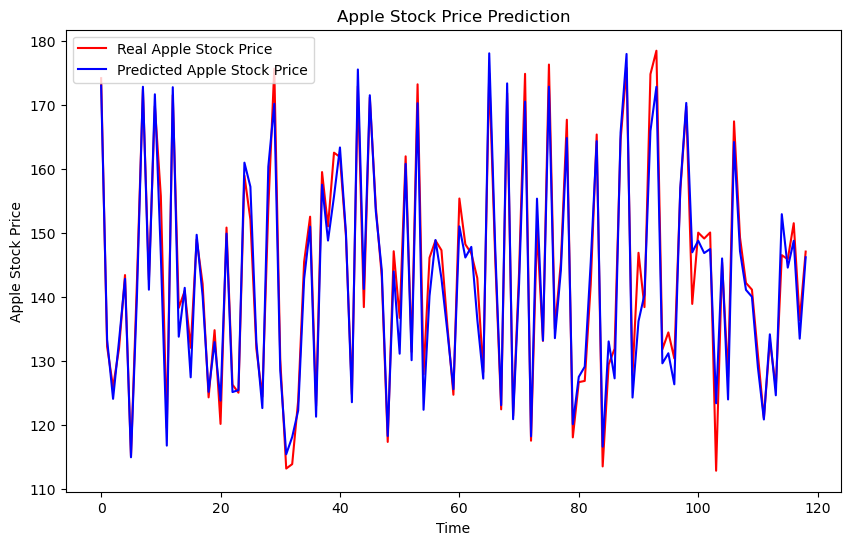

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Optimized parameters
n_layers = 3
n_units = 84
dropout_rate = 0.0  # Dropout of 0 implies no dropout layer
learning_rate = 0.00898562340652575
batch_size = 32

# Fetch stock data from Yahoo Finance
data = yf.download('AAPL', start='2020-06-01', end='2023-01-01')
close_prices = data['Close'].values.reshape(-1, 1)

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

# Helper function to create sequences
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

X, y = create_dataset(close_prices_scaled)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct the LSTM model based on the optimized parameters
model = Sequential()
model.add(LSTM(units=n_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))
for _ in range(1, n_layers):
    return_sequences = _ < n_layers - 1
    model.add(LSTM(units=n_units, return_sequences=return_sequences))
    model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1)  # Increase epochs for better training

# Predicting and inverse transforming the predictions
predicted_stock_price = model.predict(X_val)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transforming the actual prices for comparison
real_stock_price = scaler.inverse_transform(y_val.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()
